# Mobile Price Classification Using KNN

In [469]:
# Importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score 

In [470]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

## Without Normalization

In [471]:
data_set = np.round(data_set, decimals=4) 
data_set.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [472]:
# Dropping the class labels from the dataset
dset_modified = data_set.drop('price_range', axis=1)

In [473]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_set.columns[:-1])
data_set_feat = np.round(data_set_feat, decimals=4)

In [474]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [475]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates1 = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5, verbose=1)
   print(final_score)
   Accurate_rates1.append(final_score.mean())

[0.895  0.915  0.915  0.9125 0.9025]
[0.875  0.925  0.9025 0.89   0.8825]
[0.92   0.92   0.9325 0.9175 0.9075]
[0.915  0.9225 0.915  0.905  0.89  ]
[0.92   0.9175 0.925  0.925  0.91  ]
[0.9175 0.94   0.92   0.9225 0.9025]
[0.9325 0.9375 0.925  0.925  0.905 ]
[0.935  0.9325 0.93   0.92   0.905 ]
[0.9425 0.935  0.9375 0.93   0.91  ]
[0.94   0.94   0.9225 0.9325 0.9225]
[0.9425 0.9375 0.94   0.93   0.9225]
[0.9325 0.94   0.925  0.93   0.9225]
[0.94   0.935  0.9425 0.935  0.9175]
[0.93   0.945  0.9275 0.93   0.9125]
[0.9425 0.935  0.9275 0.925  0.92  ]
[0.935  0.9425 0.925  0.925  0.9125]
[0.9375 0.94   0.9325 0.9275 0.92  ]
[0.94   0.9425 0.93   0.925  0.915 ]
[0.94   0.9375 0.9325 0.9275 0.9225]
[0.9325 0.94   0.9325 0.925  0.92  ]
[0.935  0.935  0.9325 0.93   0.915 ]
[0.93   0.94   0.9275 0.935  0.915 ]
[0.9325 0.9375 0.935  0.9375 0.92  ]
[0.925  0.935  0.9325 0.9325 0.915 ]
[0.93   0.9325 0.935  0.9325 0.925 ]
[0.935  0.945  0.9275 0.94   0.9225]
[0.945  0.9375 0.93   0.935  0.9175]
[

In [476]:
Acc_Rate_Per1 = [el*100 for el in Accurate_rates1]

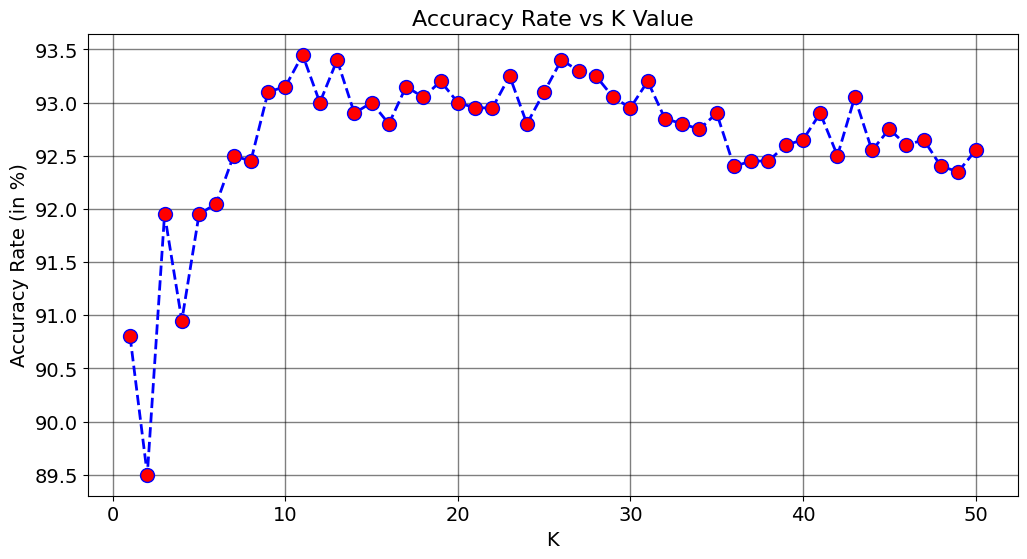

In [477]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per1 , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 11
Test Accuracy (Without Normalization): 94.0 %
Test Precision (Without Normalization): 94.04 %
Test Recall (Without Normalization) 93.94 %
Test F1 Score (Without Normalization): 93.95 %


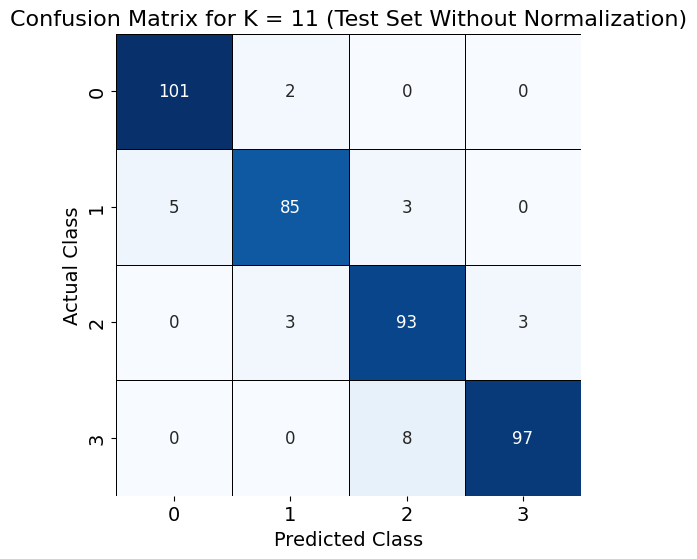

In [478]:
max_index1 = Accurate_rates1.index(max(Accurate_rates1))
k_nearest_neighbour1 = KNeighborsClassifier(n_neighbors=max_index1+1)

k_nearest_neighbour1.fit(one_train, two_train)
prediction1 = k_nearest_neighbour1.predict(one_test)

print('For K =', max_index1+1)
conf_matrix1 = confusion_matrix(two_test, prediction1)
accuracy_test1 = accuracy_score(two_test, prediction1)
precision_test1 = precision_score(two_test, prediction1, average='macro')
recall_test1 = recall_score(two_test, prediction1, average='macro')
f1score_test1 = f1_score(two_test, prediction1, average='macro')

acc_tst1 = round(np.mean(accuracy_test1)*100,2)
pre_tst1 = round(np.mean(precision_test1)*100,2)
rec_tst1 = round(np.mean(recall_test1)*100,2)
f1_tst1 = round(np.mean(f1score_test1)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization)',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour1.classes_, yticklabels=k_nearest_neighbour1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index1+1) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

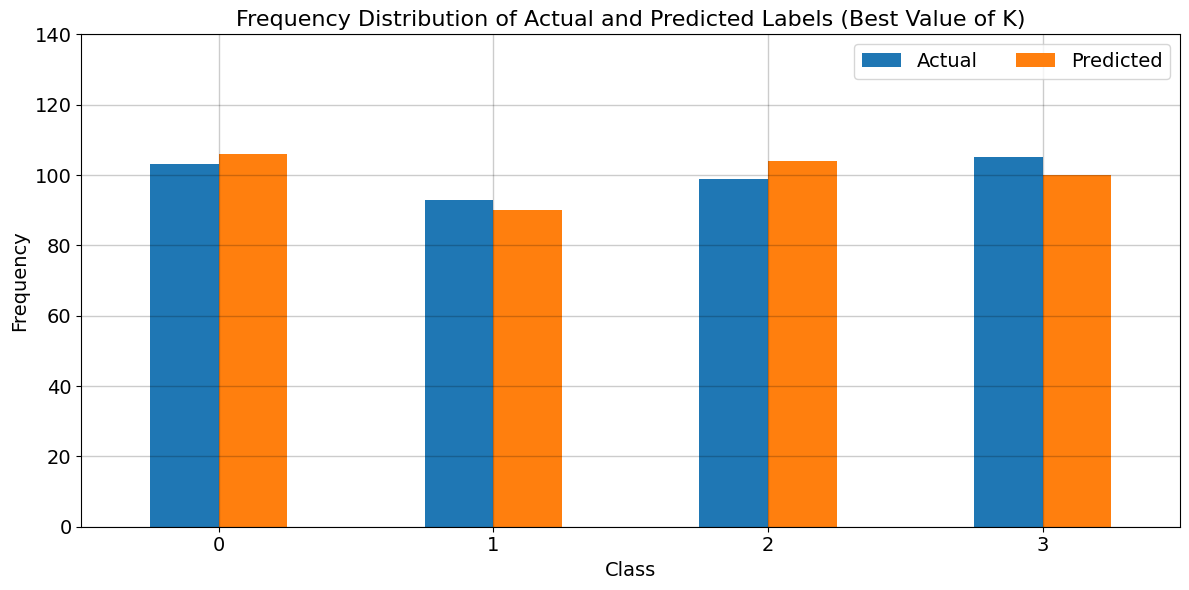

In [479]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels1, predicted_counts1 = np.unique(prediction1, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', color='black', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Test Accuracy (Without Normalization): 94.0 %
Test Precision (Without Normalization): 94.02 %
Test Recall (Without Normalization) 94.04 %
Test F1 Score (Without Normalization): 93.99 %


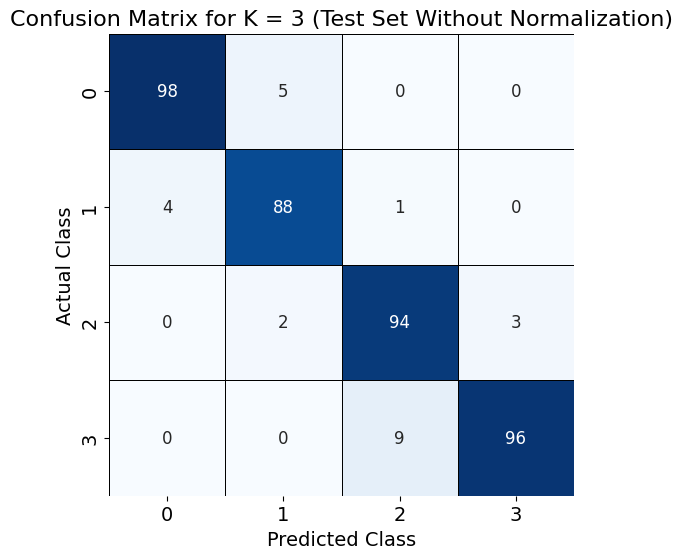

In [480]:
t = 3
k_nearest_neighbour2 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour2.fit(one_train, two_train)
prediction2 = k_nearest_neighbour2.predict(one_test)

print('For K =', t)
conf_matrix2 = confusion_matrix(two_test, prediction2)
accuracy_test2 = accuracy_score(two_test, prediction2)
precision_test2 = precision_score(two_test, prediction2, average='macro')
recall_test2 = recall_score(two_test, prediction2, average='macro')
f1score_test2 = f1_score(two_test, prediction2, average='macro')

acc_tst2 = round(np.mean(accuracy_test2)*100,2)
pre_tst2 = round(np.mean(precision_test2)*100,2)
rec_tst2 = round(np.mean(recall_test2)*100,2)
f1_tst2 = round(np.mean(f1score_test2)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization)',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour2.classes_, yticklabels=k_nearest_neighbour2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

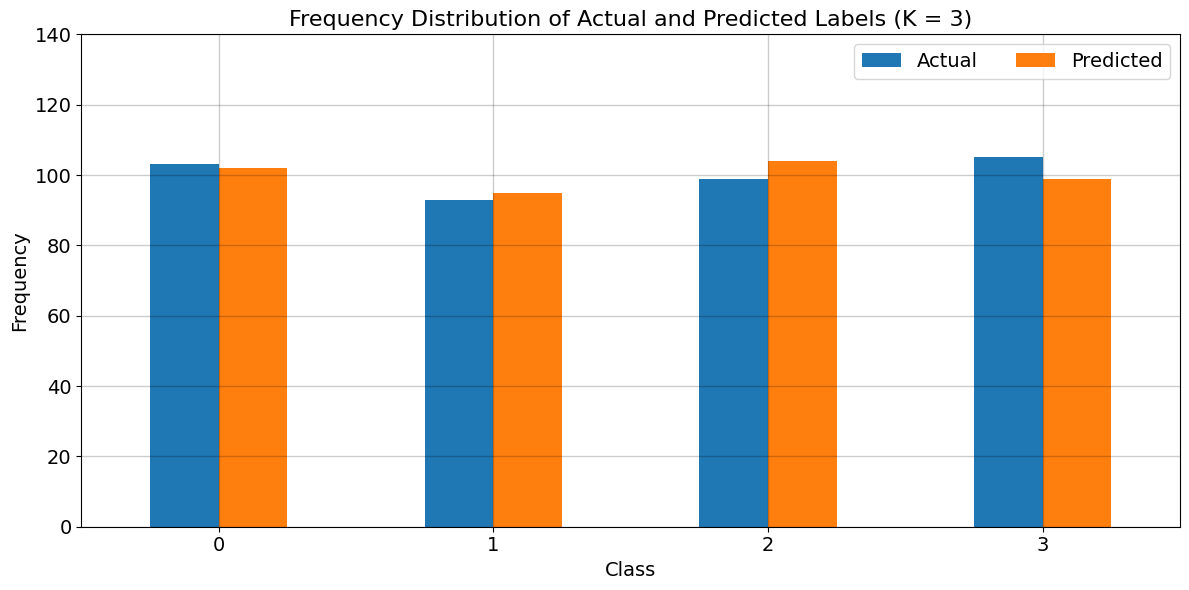

In [481]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels2, predicted_counts2 = np.unique(prediction2, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Test Accuracy (Without Normalization): 93.75 %
Test Precision (Without Normalization): 93.74 %
Test Recall (Without Normalization) 93.77 %
Test F1 Score (Without Normalization): 93.74 %


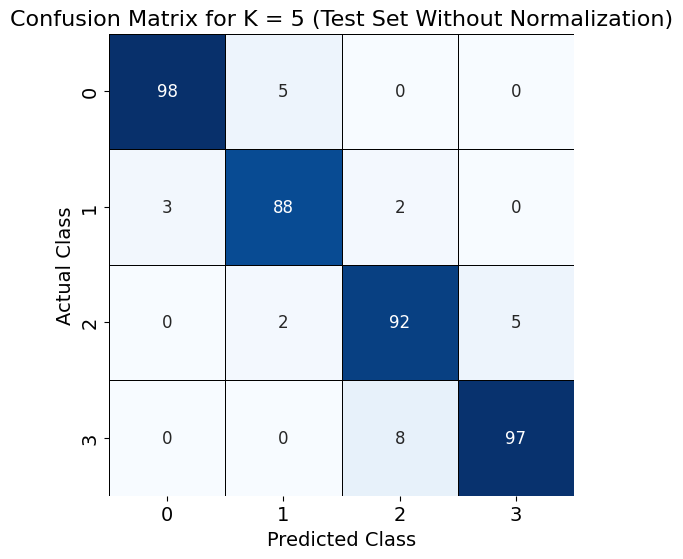

In [482]:
t = 5
k_nearest_neighbour3 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour3.fit(one_train, two_train)
prediction3 = k_nearest_neighbour3.predict(one_test)

print('For K =', t)
conf_matrix3 = confusion_matrix(two_test, prediction3)
accuracy_test3 = accuracy_score(two_test, prediction3)
precision_test3 = precision_score(two_test, prediction3, average='macro')
recall_test3 = recall_score(two_test, prediction3, average='macro')
f1score_test3 = f1_score(two_test, prediction3, average='macro')

acc_tst3 = round(np.mean(accuracy_test3)*100,2)
pre_tst3 = round(np.mean(precision_test3)*100,2)
rec_tst3 = round(np.mean(recall_test3)*100,2)
f1_tst3 = round(np.mean(f1score_test3)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst3,'%')
print('Test Precision (Without Normalization):',pre_tst3,'%')
print('Test Recall (Without Normalization)',rec_tst3,'%')
print('Test F1 Score (Without Normalization):',f1_tst3,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour3.classes_, yticklabels=k_nearest_neighbour3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

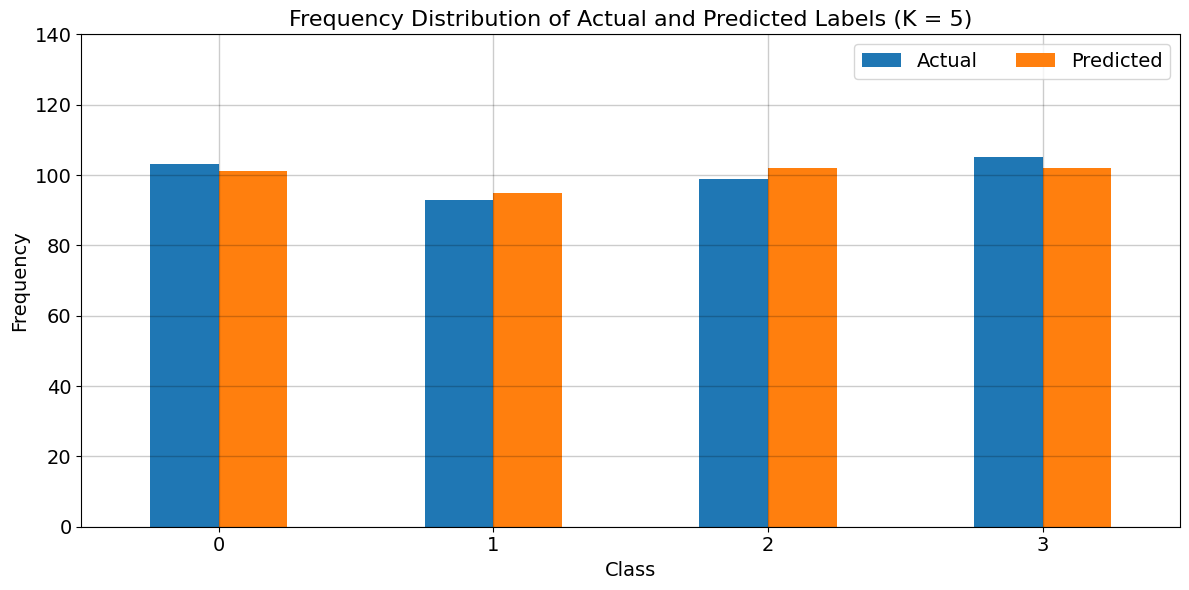

In [483]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels3, predicted_counts3 = np.unique(prediction3, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Test Accuracy (Without Normalization): 92.25 %
Test Precision (Without Normalization): 92.24 %
Test Recall (Without Normalization) 92.19 %
Test F1 Score (Without Normalization): 92.17 %


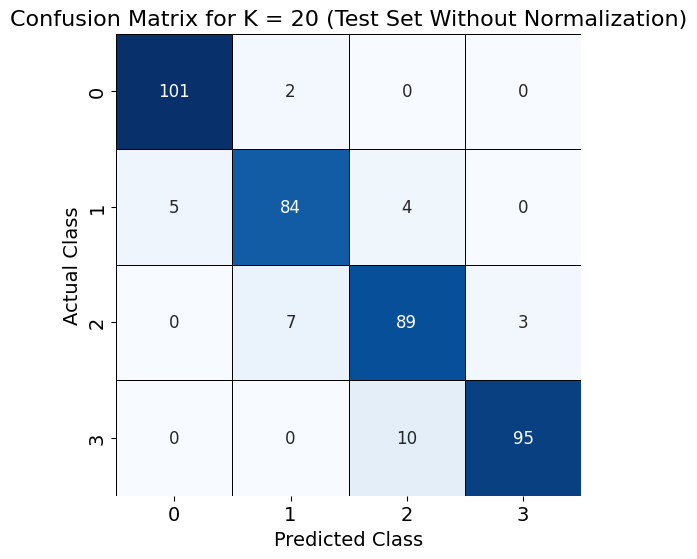

In [484]:
t = 20
k_nearest_neighbour4 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour4.fit(one_train, two_train)
prediction4 = k_nearest_neighbour4.predict(one_test)

print('For K =', t)
conf_matrix4 = confusion_matrix(two_test, prediction4)
accuracy_test4 = accuracy_score(two_test, prediction4)
precision_test4 = precision_score(two_test, prediction4, average='macro')
recall_test4 = recall_score(two_test, prediction4, average='macro')
f1score_test4 = f1_score(two_test, prediction4, average='macro')

acc_tst4 = round(np.mean(accuracy_test4)*100,2)
pre_tst4 = round(np.mean(precision_test4)*100,2)
rec_tst4 = round(np.mean(recall_test4)*100,2)
f1_tst4 = round(np.mean(f1score_test4)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst4,'%')
print('Test Precision (Without Normalization):',pre_tst4,'%')
print('Test Recall (Without Normalization)',rec_tst4,'%')
print('Test F1 Score (Without Normalization):',f1_tst4,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour4.classes_, yticklabels=k_nearest_neighbour4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

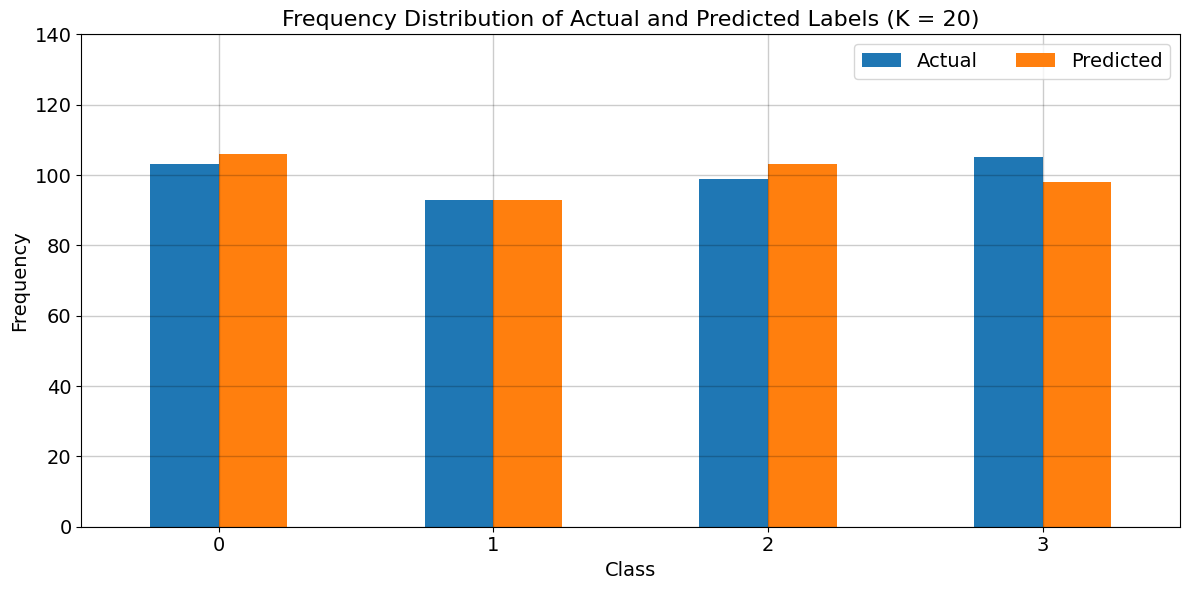

In [485]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels4, predicted_counts4 = np.unique(prediction4, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Test Accuracy (Without Normalization): 91.75 %
Test Precision (Without Normalization): 91.71 %
Test Recall (Without Normalization) 91.65 %
Test F1 Score (Without Normalization): 91.64 %


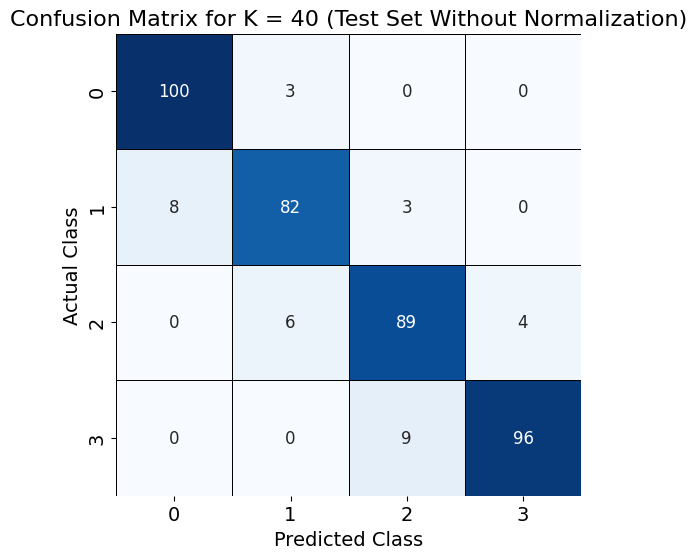

In [486]:
t = 40
k_nearest_neighbour5 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour5.fit(one_train, two_train)
prediction5 = k_nearest_neighbour5.predict(one_test)

print('For K =', t)
conf_matrix5 = confusion_matrix(two_test, prediction5)
accuracy_test5 = accuracy_score(two_test, prediction5)
precision_test5 = precision_score(two_test, prediction5, average='macro')
recall_test5 = recall_score(two_test, prediction5, average='macro')
f1score_test5 = f1_score(two_test, prediction5, average='macro')

acc_tst5 = round(np.mean(accuracy_test5)*100,2)
pre_tst5 = round(np.mean(precision_test5)*100,2)
rec_tst5 = round(np.mean(recall_test5)*100,2)
f1_tst5 = round(np.mean(f1score_test5)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst5,'%')
print('Test Precision (Without Normalization):',pre_tst5,'%')
print('Test Recall (Without Normalization)',rec_tst5,'%')
print('Test F1 Score (Without Normalization):',f1_tst5,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour5.classes_, yticklabels=k_nearest_neighbour5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

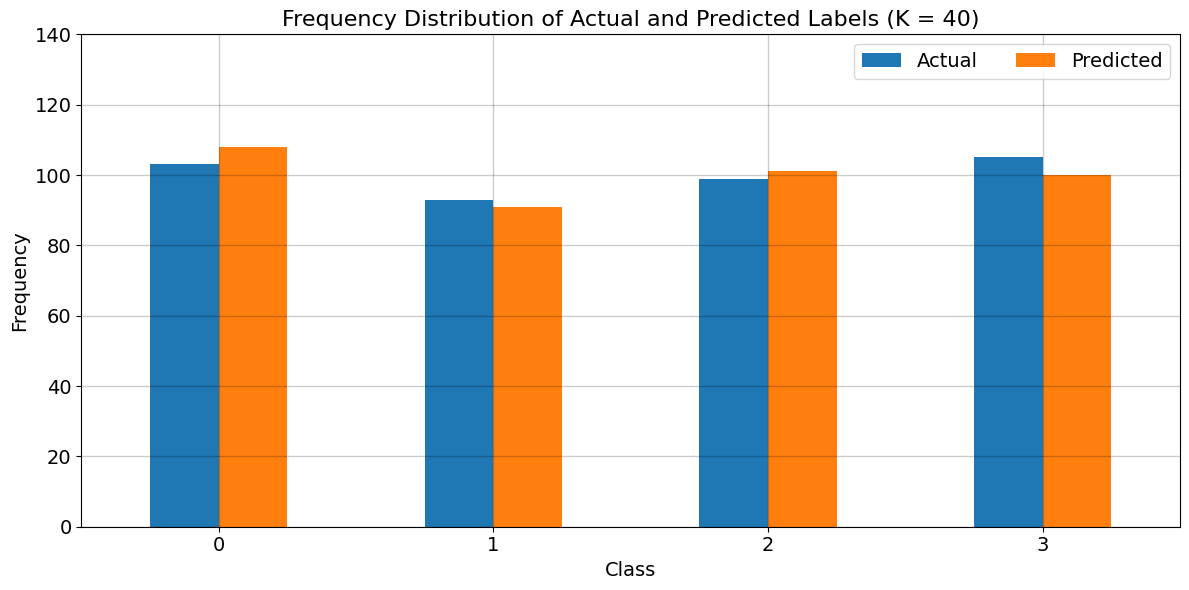

In [487]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels5, predicted_counts5 = np.unique(prediction5, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [488]:
scaled = StandardScaler()
scaled.fit(data_set.drop('price_range', axis=1))

StandardScaler()

In [489]:
# Dropping the class labels from the normalized dataset
dset_modified = scaled.transform(data_set.drop('price_range', axis=1)) 

In [490]:
data_set_feat = pd.DataFrame(dset_modified,columns=data_set.columns[:-1]) 
data_set_feat = np.round(data_set_feat, decimals=4) 
data_set_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.9026,-0.9900,0.8308,-1.0192,-0.7625,-1.0440,-1.3806,0.3407,1.3492,-1.1020,-1.3058,-1.4089,-1.1468,0.3917,-0.7850,0.2831,1.4625,-1.7869,-1.006,0.9861
1,-0.4951,1.0101,-1.2531,0.9812,-0.9929,0.9579,1.1550,0.6875,-0.1201,-0.6648,-0.6460,0.5858,1.7045,0.4673,1.1143,-0.6353,-0.7343,0.5596,0.994,-1.0141
2,-1.5377,1.0101,-1.2531,0.9812,-0.5321,0.9579,0.4935,1.3812,0.1342,0.2096,-0.6460,1.3927,1.0750,0.4415,-0.3102,-0.8649,-0.3681,0.5596,0.994,-1.0141
3,-1.4193,1.0101,1.1985,-1.0192,-0.9929,-1.0440,-1.2153,1.0344,-0.2613,0.6468,-0.1512,1.2867,1.2370,0.5946,0.8769,0.5127,-0.0020,0.5596,-1.006,-1.0141
4,1.3259,1.0101,-0.3950,-1.0192,2.0023,0.9579,0.6589,0.3407,0.0212,-1.1020,0.6735,1.2687,-0.0915,-0.6577,-1.0224,-0.8649,0.7302,0.5596,0.994,-1.0141


In [491]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [492]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates2 = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5)
   print(final_score)
   Accurate_rates2.append(final_score.mean())

[0.445  0.46   0.46   0.47   0.4325]
[0.4275 0.445  0.44   0.4575 0.44  ]
[0.4575 0.4725 0.46   0.4725 0.44  ]
[0.48   0.515  0.5075 0.5375 0.4825]
[0.5075 0.5    0.5125 0.5075 0.4875]
[0.5075 0.525  0.485  0.5375 0.475 ]
[0.53   0.5175 0.495  0.5275 0.5025]
[0.525  0.5175 0.4875 0.5475 0.5225]
[0.575 0.56  0.505 0.555 0.525]
[0.56   0.565  0.535  0.55   0.5225]
[0.5675 0.5725 0.5325 0.57   0.5   ]
[0.56   0.5775 0.5525 0.575  0.5325]
[0.5775 0.5925 0.5525 0.5775 0.545 ]
[0.585  0.585  0.5725 0.595  0.5425]
[0.5675 0.575  0.57   0.5975 0.5425]
[0.59   0.5775 0.5775 0.6025 0.5625]
[0.6    0.5875 0.58   0.6025 0.585 ]
[0.6075 0.5925 0.5775 0.58   0.575 ]
[0.6    0.5975 0.57   0.6025 0.575 ]
[0.6025 0.6025 0.59   0.6025 0.58  ]
[0.6125 0.6025 0.5975 0.595  0.5975]
[0.6175 0.6175 0.605  0.62   0.6125]
[0.6275 0.6225 0.605  0.6175 0.605 ]
[0.6275 0.6475 0.605  0.615  0.5925]
[0.6175 0.6475 0.61   0.605  0.6   ]
[0.625  0.645  0.6025 0.63   0.6125]
[0.6375 0.6375 0.61   0.62   0.6125]
[0.63 

In [493]:
Acc_Rate_Per2 = [el*100 for el in Accurate_rates2]

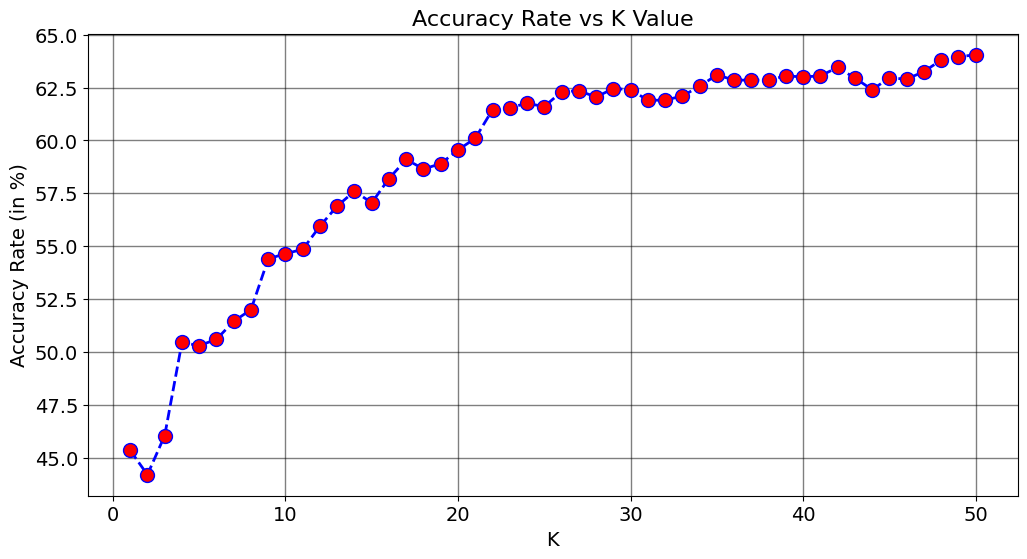

In [494]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per2 , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 50
Test Accuracy (Without Normalization): 62.5 %
Test Precision (Without Normalization): 62.06 %
Test Recall (Without Normalization) 62.18 %
Test F1 Score (Without Normalization): 61.9 %


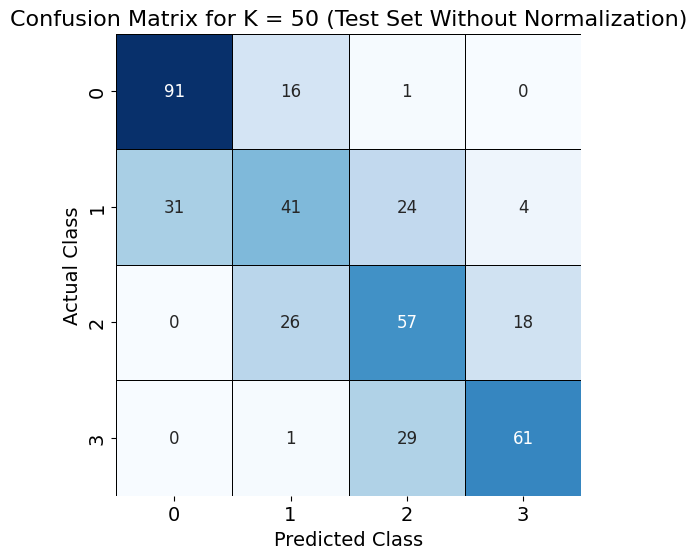

In [495]:
# First K value based on Accurate_rates
max_index2 = Accurate_rates2.index(max(Accurate_rates2))
k_nearest_neighbour6 = KNeighborsClassifier(n_neighbors=max_index2+1)

k_nearest_neighbour6.fit(one_train, two_train)
prediction6 = k_nearest_neighbour6.predict(one_test)

print('For K =', max_index2+1)
conf_matrix6 = confusion_matrix(two_test, prediction6)
accuracy_test6 = accuracy_score(two_test, prediction6)
precision_test6 = precision_score(two_test, prediction6, average='macro')
recall_test6 = recall_score(two_test, prediction6, average='macro')
f1score_test6 = f1_score(two_test, prediction6, average='macro')

acc_tst6 = round(np.mean(accuracy_test6)*100,2)
pre_tst6 = round(np.mean(precision_test6)*100,2)
rec_tst6 = round(np.mean(recall_test6)*100,2)
f1_tst6 = round(np.mean(f1score_test6)*100,2)

print('Test Accuracy (Without Normalization):',acc_tst6,'%')
print('Test Precision (Without Normalization):',pre_tst6,'%')
print('Test Recall (Without Normalization)',rec_tst6,'%')
print('Test F1 Score (Without Normalization):',f1_tst6,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour6.classes_, yticklabels=k_nearest_neighbour6.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index2+1) + ' (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

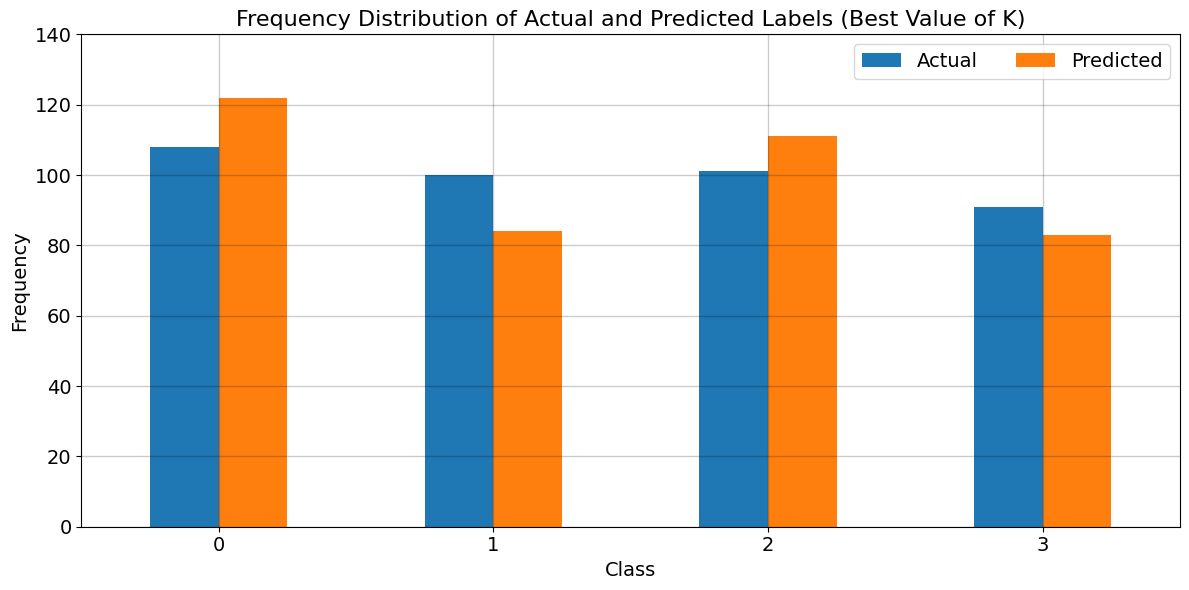

In [496]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels6, predicted_counts6 = np.unique(prediction6, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts6, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Test Accuracy (With Normalization): 44.25 %
Test Precision (With Normalization): 46.34 %
Test Recall (With Normalization) 44.04 %
Test F1 Score (With Normalization): 44.24 %


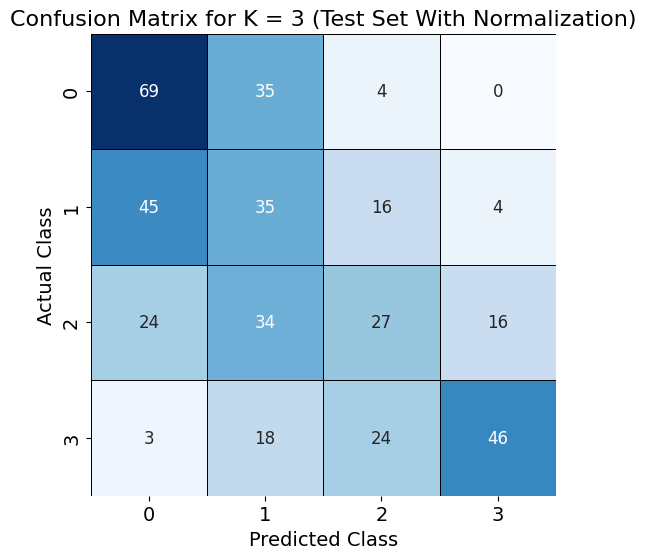

In [497]:
t = 3
k_nearest_neighbour7 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour7.fit(one_train, two_train)
prediction7 = k_nearest_neighbour7.predict(one_test)

print('For K =', t)
conf_matrix7 = confusion_matrix(two_test, prediction7)
accuracy_test7 = accuracy_score(two_test, prediction7)
precision_test7 = precision_score(two_test, prediction7, average='macro')
recall_test7 = recall_score(two_test, prediction7, average='macro')
f1score_test7 = f1_score(two_test, prediction7, average='macro')

acc_tst7 = round(np.mean(accuracy_test7)*100,2)
pre_tst7 = round(np.mean(precision_test7)*100,2)
rec_tst7 = round(np.mean(recall_test7)*100,2)
f1_tst7 = round(np.mean(f1score_test7)*100,2)

print('Test Accuracy (With Normalization):',acc_tst7,'%')
print('Test Precision (With Normalization):',pre_tst7,'%')
print('Test Recall (With Normalization)',rec_tst7,'%')
print('Test F1 Score (With Normalization):',f1_tst7,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour7.classes_, yticklabels=k_nearest_neighbour7.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

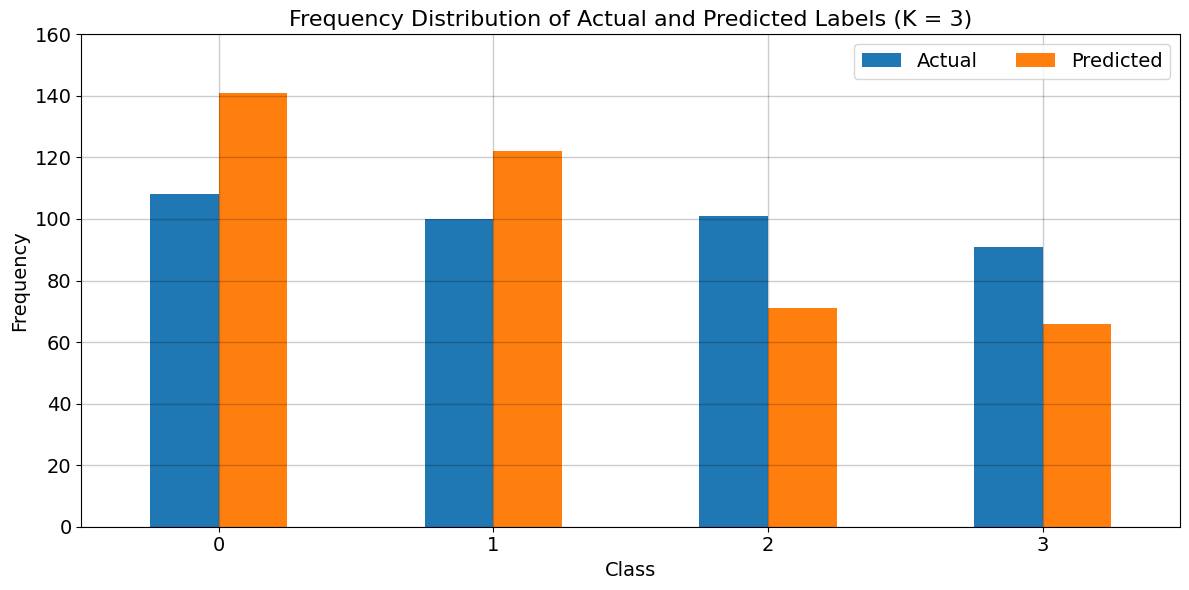

In [498]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels7, predicted_counts7 = np.unique(prediction7, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts7, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,160))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Test Accuracy (Wit Normalization): 48.75 %
Test Precision (With Normalization): 49.62 %
Test Recall (With Normalization) 48.21 %
Test F1 Score (With Normalization): 48.28 %


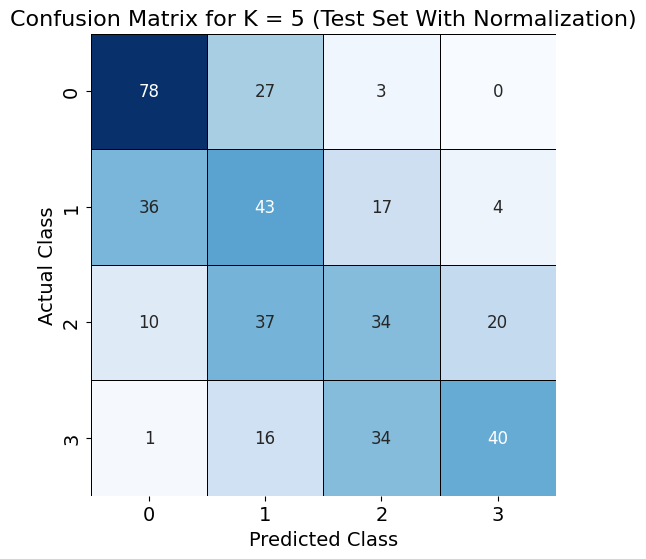

In [499]:
t = 5
k_nearest_neighbour8 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour8.fit(one_train, two_train)
prediction8 = k_nearest_neighbour8.predict(one_test)

print('For K =', t)
conf_matrix8 = confusion_matrix(two_test, prediction8)
accuracy_test8 = accuracy_score(two_test, prediction8)
precision_test8 = precision_score(two_test, prediction8, average='macro')
recall_test8 = recall_score(two_test, prediction8, average='macro')
f1score_test8 = f1_score(two_test, prediction8, average='macro')

acc_tst8 = round(np.mean(accuracy_test8)*100,2)
pre_tst8 = round(np.mean(precision_test8)*100,2)
rec_tst8 = round(np.mean(recall_test8)*100,2)
f1_tst8 = round(np.mean(f1score_test8)*100,2)

print('Test Accuracy (Wit Normalization):',acc_tst8,'%')
print('Test Precision (With Normalization):',pre_tst8,'%')
print('Test Recall (With Normalization)',rec_tst8,'%')
print('Test F1 Score (With Normalization):',f1_tst8,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour8.classes_, yticklabels=k_nearest_neighbour8.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

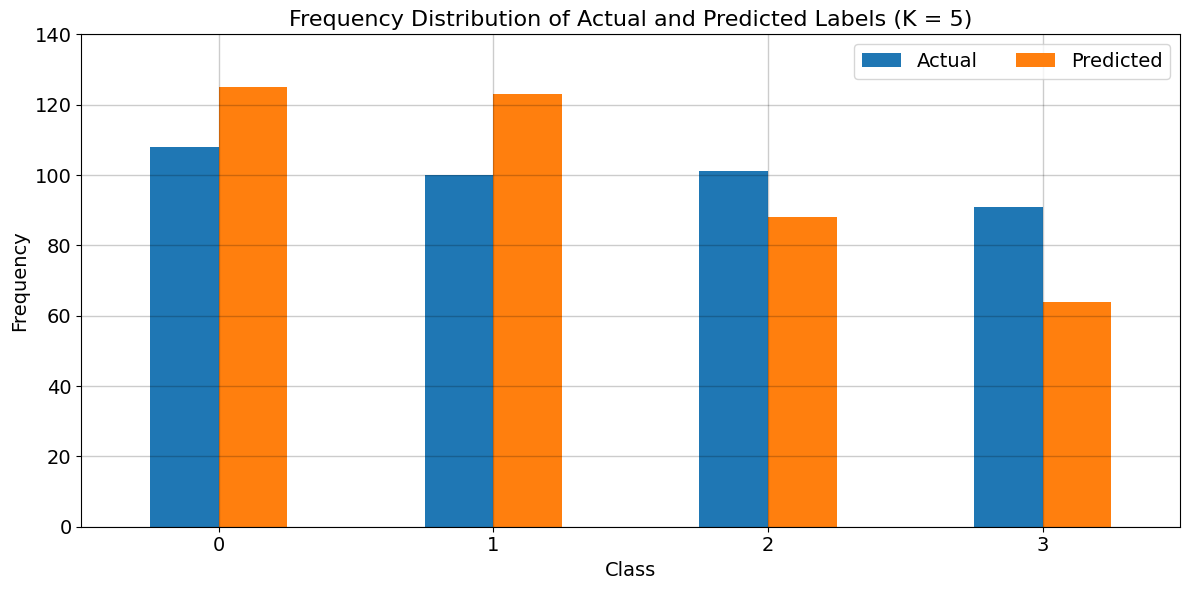

In [500]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels8, predicted_counts8 = np.unique(prediction8, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts8, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Test Accuracy (With Normalization): 58.75 %
Test Precision (With Normalization): 59.12 %
Test Recall (With Normalization) 58.47 %
Test F1 Score (With Normalization): 58.62 %


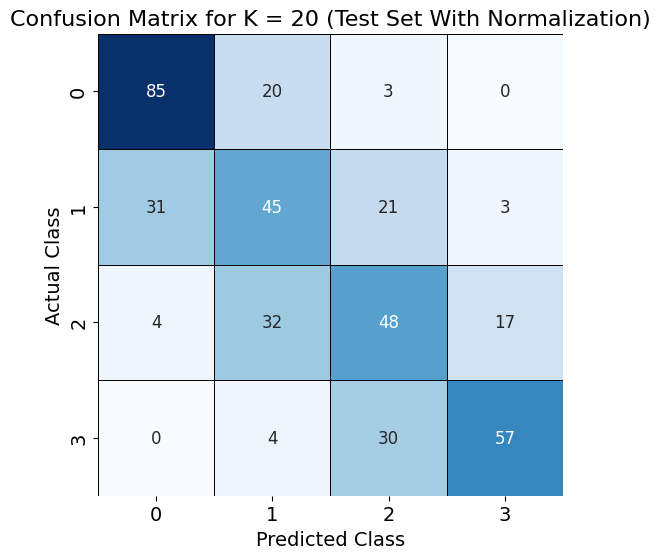

In [501]:
t = 20
k_nearest_neighbour9 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour9.fit(one_train, two_train)
prediction9 = k_nearest_neighbour9.predict(one_test)

print('For K =', t)
conf_matrix9 = confusion_matrix(two_test, prediction9)
accuracy_test9 = accuracy_score(two_test, prediction9)
precision_test9 = precision_score(two_test, prediction9, average='macro')
recall_test9 = recall_score(two_test, prediction9, average='macro')
f1score_test9 = f1_score(two_test, prediction9, average='macro')

acc_tst9 = round(np.mean(accuracy_test9)*100,2)
pre_tst9 = round(np.mean(precision_test9)*100,2)
rec_tst9 = round(np.mean(recall_test9)*100,2)
f1_tst9 = round(np.mean(f1score_test9)*100,2)

print('Test Accuracy (With Normalization):',acc_tst9,'%')
print('Test Precision (With Normalization):',pre_tst9,'%')
print('Test Recall (With Normalization)',rec_tst9,'%')
print('Test F1 Score (With Normalization):',f1_tst9,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix9, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour9.classes_, yticklabels=k_nearest_neighbour9.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

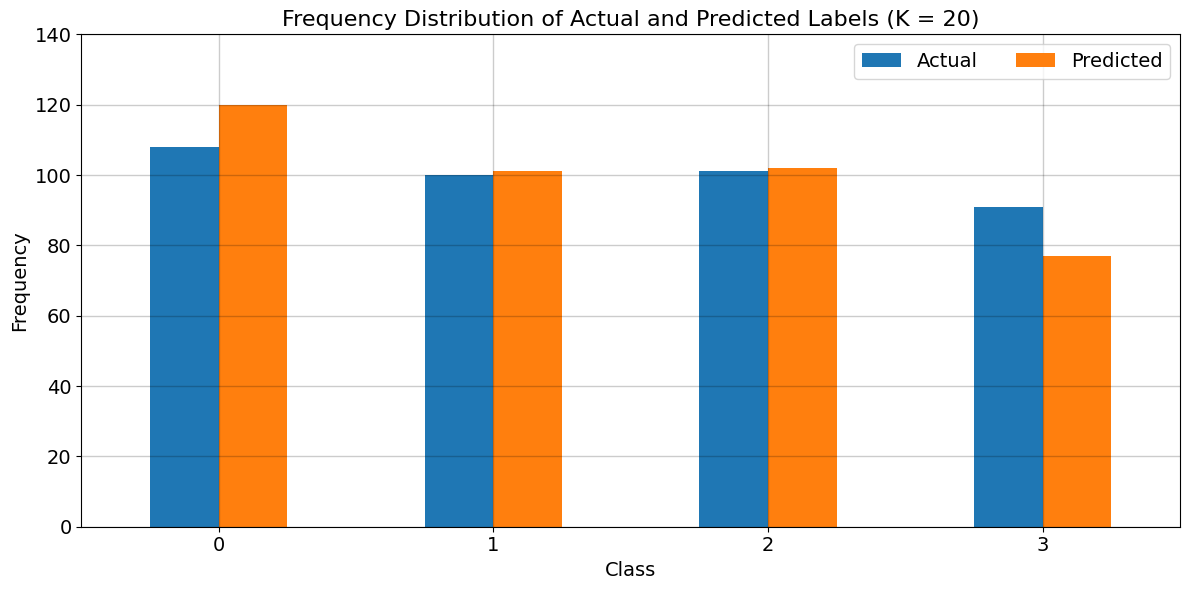

In [502]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels9, predicted_counts9 = np.unique(prediction9, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts9, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Test Accuracy (With Normalization): 61.5 %
Test Precision (With Normalization): 61.1 %
Test Recall (With Normalization) 61.07 %
Test F1 Score (With Normalization): 60.63 %


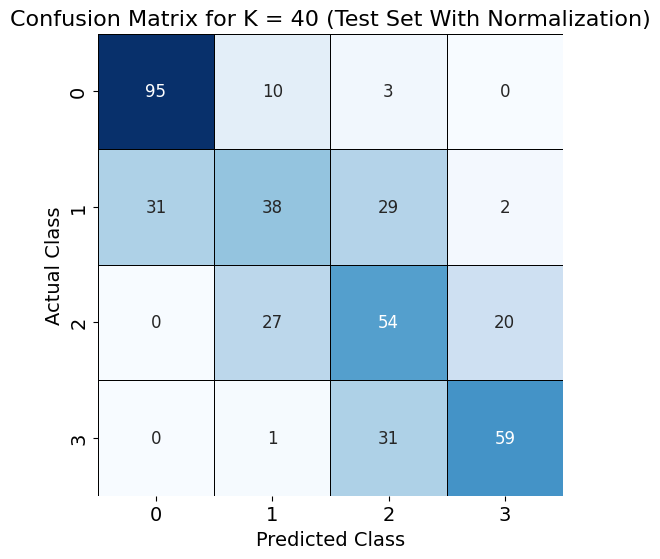

In [503]:
t = 40
k_nearest_neighbour10 = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour10.fit(one_train, two_train)
prediction10 = k_nearest_neighbour10.predict(one_test)

print('For K =', t)
conf_matrix10 = confusion_matrix(two_test, prediction10)
accuracy_test10 = accuracy_score(two_test, prediction10)
precision_test10 = precision_score(two_test, prediction10, average='macro')
recall_test10 = recall_score(two_test, prediction10, average='macro')
f1score_test10 = f1_score(two_test, prediction10, average='macro')

acc_tst10 = round(np.mean(accuracy_test10)*100,2)
pre_tst10 = round(np.mean(precision_test10)*100,2)
rec_tst10 = round(np.mean(recall_test10)*100,2)
f1_tst10 = round(np.mean(f1score_test10)*100,2)

print('Test Accuracy (With Normalization):',acc_tst10,'%')
print('Test Precision (With Normalization):',pre_tst10,'%')
print('Test Recall (With Normalization)',rec_tst10,'%')
print('Test F1 Score (With Normalization):',f1_tst10,'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix10, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour10.classes_, yticklabels=k_nearest_neighbour10.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t) + ' (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

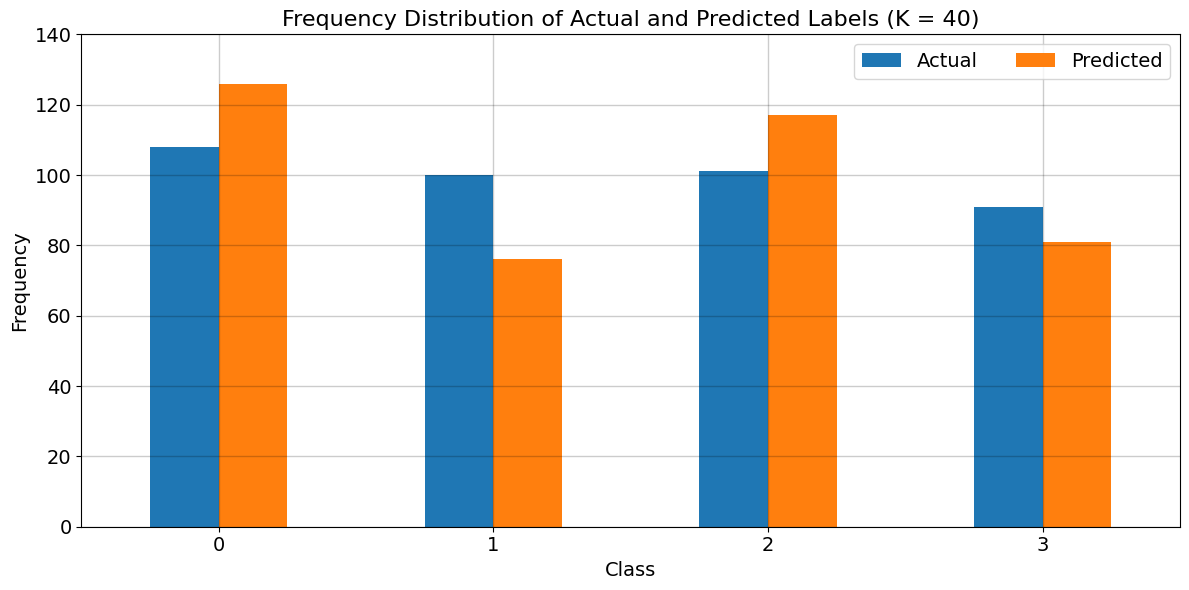

In [504]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels10, predicted_counts10 = np.unique(prediction10, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts10, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***